# Readability Assessment through Recurrent Neural Network

Readability assessment is a well known problem in natural language processing field. Giving someone the suitable text for his level of comprehension (not so easy and not so hard) could maximize his understanding and enjoyment. In this notebook we are trying to assess the readability of a given text regardless of the text subject using recurrent neural network.

## Corpus
> OneStopEnglish corpus: A new corpus for automatic readability assessment and text simplification  
> Sowmya Vajjala and Ivana Lučić  
> 2018  
> Proceedings of the Thirteenth Workshop on Innovative Use of NLP for Building Educational Applications, pages 297–304. Association for Computational Linguistics.  
> [url](http://aclweb.org/anthology/W18-0535). [bib file](https://aclanthology.coli.uni-saarland.de/papers/W18-0535/w18-0535.bib)

Please cite the above paper if you use this corpus in your research.

[![DOI](https://zenodo.org/badge/128919409.svg)](https://zenodo.org/badge/latestdoi/128919409)

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

Now let's dive into our corpus.

In [22]:
from __future__ import print_function

import sys
sys.path.append("/home/ms10596/PycharmProjects/match")
from ipywidgets import interact
from tabulate import tabulate
from IPython.display import display, HTML

from utils.loading import load_glove_embeddings
from utils.one_stop_english import load_corpus, corpus_to_words, corpus_to_pos

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional
import numpy as np

glove = load_glove_embeddings()
corpus = load_corpus()
articles, tags = corpus_to_words(corpus)

Reading level|Avg. Num. Words|Std. Dev|Number of Articles
---|---|---|---
Elementary|533.17|103.79|189
Intermediate|676.59|117.15|189
Advanced|820.49|162.52|189



In [23]:
@interact
def show_articles(i=(0,188,1), words=(0,1000,1)):
    data = [
        ["Advanced",articles[i][:words]], 
        ["Intermediate",articles[i+2][:words]], 
        ["Elementary",articles[i+1][:words]]
    ]
    headers = ['Reading Level', 'Example']
    display(HTML(tabulate(data,tablefmt='html', headers=headers)+"<style>th,td {font-size: 10px}</style>"))

interactive(children=(IntSlider(value=94, description='i', max=188), IntSlider(value=500, description='words',…

## ~~Feature Extraction~~

In [24]:
@interact
def show_features(i=(0,60,1)):
    data = [["Adjectives (ADJ) like warm, fat"],["Adverbs (ADV) like almost, too, very"],["Articles (ART) like a, an, the"],["Conjunctions (CONJ) like for, and, nor"],["Interjections (INTERJ) like wow, oops, ouch"],["Nouns (NOUN) like boy, girl, doctor, town"],["Numerals (NUM) like 1, 155, 89"],["Past participles (PASTPART) like taken, eaten"],["Prepositions (PREP) like at, for, in, off"],["Pronouns (PRON) like he, she, you, I"],["Punctuation (PUNCT) like ?, :, ;, ."],["Special symbols (SYMBOL) like @, %,"] ,["Adjectives (ADJ) like warm, fat"],["Adverbs (ADV) like almost, too, very"],["Articles (ART) like a, an, the"],["Conjunctions (CONJ) like for, and, nor"],["Interjections (INTERJ) like wow, oops, ouch"],["Nouns (NOUN) like boy, girl, doctor, town"],["Numerals (NUM) like 1, 155, 89"],["Past participles (PASTPART) like taken, eaten"],["Prepositions (PREP) like at, for, in, off"],["Pronouns (PRON) like he, she, you, I"],["Punctuation (PUNCT) like ?, :, ;, ."],["Special symbols (SYMBOL) like @, %, "],["Nominal phrases (NP) like The dog on the sofa"],["Adjectival phrases (AP) like The movie was terrible"],["Prepositional phrases (PP) like We stayed by the river"],["Adverbial phrases (ADVP) like The carpenter hit the nail with a hammer."],["Temporal auxiliary verb phrases (VTEMP) like I was wondering about."],["Aspectual auxiliary verb phrases (VASP) l have seen the light"],["Modal auxiliary verb phrases (VMOD) I should study"],["Copulative verb phrases (VCOP) John is happy"],["Past participle verb phrases (VPASTPART) I have bought"],["Gerundive verb phrases (VGER) Running is a good exercise"],["Infinitive verb phrases (VINF) I want to study."],["Finite verb phrases (VF) She plays guitar"],["Sub-clause phrases (SC e REL)Until Mr. Sanchez has his first cup"],["Verb phrases (VF e VCOP) Ali is going to school"],["Number of sentences"],["Number of words"],["Number of different words"],["Number of different verbs forms"],["Number of auxiliary verbs"],["Number of main verbs"],["Average number of verb phrases per sentence"],["Average length of sentences"],["Average length of syllables per word"],["Average size of verbal chains"],["Average size of coordination relation’s chains"],["Frequency of words with 1-4 syllables"],["Frequency of words with more than 4 syllables"],["Total number of dependencies"],["Total number of tree nodes"],["Number of pronouns per noun phrases (NP)"],["Number of NP with a definite or demonstrative determiner"],["Number of NP with a indefinite determiner"],["Number of subordinate clauses (SC/REL chunks)"], ["Number of coordination relations"], ["Number of omit subjects"],["Flesch Reading Ease BR readability measure"]]
    display(HTML(tabulate(data[0:i],tablefmt='html')+"<style>th,td {font-size: 10px}</style>"))

interactive(children=(IntSlider(value=30, description='i', max=60), Output()), _dom_classes=('widget-interact'…

### As we see there are plenty of features we can extract.
* Feature Engineering is a tedious process and needs a great experience.
* Also those features neglect sentence structure as they destroy the ordering of text.
> so we are not going to extract features. every word will be feature itself.

## Word Embedding
So now we need a good representation of words that could match each word to a number or group of numbers so that they keep some of the semantic properties and similarities

In [25]:
glove['hey']
# todo plot embeddings and show relations between words

array([-0.7001  ,  0.36781 ,  0.34424 , -0.42318 , -0.046018, -0.66072 ,
       -0.33993 ,  0.18271 , -0.92863 ,  0.5684  , -0.43819 ,  0.70827 ,
       -0.47459 , -0.079269,  1.0187  ,  0.2213  ,  0.43073 ,  0.76719 ,
        0.18774 , -0.49214 , -0.53063 ,  0.56379 ,  0.63571 ,  0.64622 ,
        1.2649  , -0.82901 , -1.3903  ,  0.3749  ,  0.61316 , -1.5994  ,
        1.3005  ,  0.64347 , -0.58004 ,  1.0372  , -0.27156 , -0.43382 ,
        0.8554  , -0.8967  ,  0.80176 , -0.33333 , -0.17654 , -0.12277 ,
       -0.70508 , -0.28412 ,  0.71149 , -0.13487 ,  0.049514, -0.8134  ,
        0.34293 ,  1.0381  ], dtype=float32)

In [26]:
maxlen = 1000 # Cuts off reviews after 100 words
training_samples = 450
validation_samples = 117
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(articles)
sequences = tokenizer.texts_to_sequences(articles)
data = pad_sequences(sequences, maxlen=maxlen)
labels = to_categorical(tags)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train= data[:training_samples]
y_train= labels[:training_samples]
x_val =data[training_samples:]
y_val =labels[training_samples:]
# print(data)
word_index = tokenizer.word_index

Shape of data tensor: (567, 1000)
Shape of label tensor: (567, 3)


In [27]:
embedding_dim = 50
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_matrix[i] = glove.get(word)

In [28]:
from tensorflow.python.client import device_lib
import tensorflow as tf
with tf.device('/gpu:0'):
    print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17682229770842955320
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15162010608248632620
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11472726188611743748
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3327459328
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1450439294987048718
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [29]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                21248     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,021,443
Trainable params: 21,443
Non-trainable params: 1,000,000
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=50,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Train on 450 samples, validate on 117 samples
Epoch 1/10
450/450 [==============================] - 63s 140ms/step - loss: 0.0080 - acc: 0.3200 - val_loss: 1.1921e-07 - val_acc: 0.3761
Epoch 2/10
250/450 [===============>..............] - ETA: 27s - loss: 1.1921e-07 - acc: 0.3200

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [31]:

some = [['Hello'], ['it'], ['is'], ['me'], ['I', 'was'],['I']]
# some = "Hello it is me I I"
tokenizer = Tokenizer(num_words=6)
tokenizer.fit_on_texts(some)
print(tokenizer.word_index)
sequences = tokenizer.texts_to_sequences(some)
print(sequences)

{'i': 1, 'hello': 2, 'it': 3, 'is': 4, 'me': 5, 'was': 6}
[[2], [3], [4], [5], [1], [1]]


In [40]:
articles, tags = corpus_to_pos(corpus)
tokenizer = Tokenizer(num_words=45)
tokenizer.fit_on_texts(articles)
print(tokenizer.word_index)
print(len(tokenizer.word_index))
sequences = tokenizer.texts_to_sequences(articles)

data = pad_sequences(sequences, maxlen=maxlen)
print(data)
labels = to_categorical(tags)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train= data[:training_samples]
y_train= labels[:training_samples]
x_val =data[training_samples:]
y_val =labels[training_samples:]

{'nn': 1, 'in': 2, 'dt': 3, 'jj': 4, 'nns': 5, 'nnp': 6, ',': 7, '.': 8, 'rb': 9, 'prp': 10, 'vb': 11, 'vbd': 12, 'cc': 13, 'vbz': 14, 'to': 15, 'vbp': 16, 'cd': 17, 'vbn': 18, 'vbg': 19, 'prp$': 20, 'md': 21, 'wdt': 22, 'wrb': 23, 'wp': 24, 'jjr': 25, 'rp': 26, ':': 27, 'jjs': 28, 'ex': 29, 'rbr': 30, 'nnps': 31, '-rrb-': 32, '-lrb-': 33, 'rbs': 34, 'pdt': 35, '$': 36, 'fw': 37, 'uh': 38, 'wp$': 39, 'sym': 40, "''": 41, 'ls': 42, 'pos': 43, '``': 44}
44
[[ 0  0  0 ...  2 17  8]
 [ 0  0  0 ...  2 17  8]
 [ 0  0  0 ...  2 17  8]
 ...
 [ 0  0  0 ...  4  1  8]
 [ 0  0  0 ...  4  1  8]
 [ 0  0  0 ...  4  1  8]]
Shape of data tensor: (567, 1000)
Shape of label tensor: (567, 3)


In [51]:
model = Sequential()
model.add(Embedding(45, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 50)          2250      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                21248     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 23,693
Trainable params: 23,693
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='acc',patience=10, verbose=1, mode='auto')

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
batch_size=50,
epochs=10,
validation_data=(x_val, y_val), callbacks=[es])
model.save_weights('pre_trained_glove_model.h5')


Train on 450 samples, validate on 117 samples
Epoch 1/10
450/450 [==============================] - 81s 180ms/step - loss: 1.0204 - acc: 0.4489 - val_loss: 1.0055 - val_acc: 0.4444
Epoch 2/10
450/450 [==============================] - 82s 182ms/step - loss: 0.9863 - acc: 0.4822 - val_loss: 0.9939 - val_acc: 0.4444
Epoch 3/10
450/450 [==============================] - 90s 201ms/step - loss: 0.9652 - acc: 0.4533 - val_loss: 0.9553 - val_acc: 0.4701
Epoch 4/10
450/450 [==============================] - 90s 199ms/step - loss: 0.9597 - acc: 0.4978 - val_loss: 0.9577 - val_acc: 0.4786
Epoch 5/10
450/450 [==============================] - 81s 180ms/step - loss: 0.9535 - acc: 0.4911 - val_loss: 0.9613 - val_acc: 0.4786
Epoch 6/10
450/450 [==============================] - 83s 184ms/step - loss: 0.9513 - acc: 0.5067 - val_loss: 0.9435 - val_acc: 0.4615
Epoch 7/10
450/450 [==============================] - 84s 186ms/step - loss: 0.9409 - acc: 0.5133 - val_loss: 0.9411 - val_acc: 0.4701
Epoch 8/1

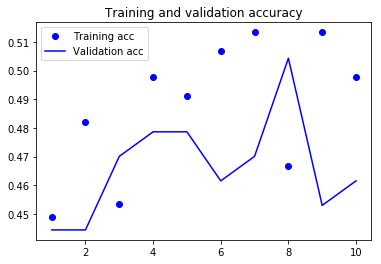

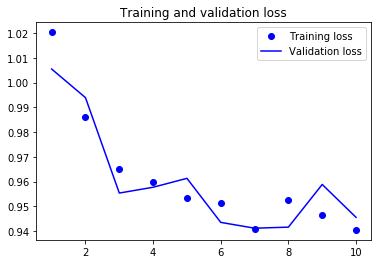

In [57]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


